In [38]:
import numpy as np

# 定义被积函数
def integrand(x):
    return 4 / (1 + x**2)

# 设置积分区间和初始分割数
a = 0
b = 1
n = 20
    
def composite_trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

# 使用复合梯形公式计算积分
approx_pi_trapezoidal = composite_trapezoidal_rule(integrand, a, b, n)
print("Approximation of pi using composite trapezoidal rule:", approx_pi_trapezoidal)


Approximation of pi using composite trapezoidal rule: 3.1411759869541287


In [39]:
def composite_simpsons_rule(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for composite Simpson's rule")
    h = (b - a) / n
    integral = f(a) + f(b)
    for i in range(1, n, 2):
        integral += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        integral += 2 * f(a + i * h)
    integral *= h / 3
    return integral

# 使用复合Simpson公式计算积分
approx_pi_simpson = composite_simpsons_rule(integrand, a, b, n)
print("Approximation of pi using composite Simpson's rule:", approx_pi_simpson)


Approximation of pi using composite Simpson's rule: 3.141592652969785


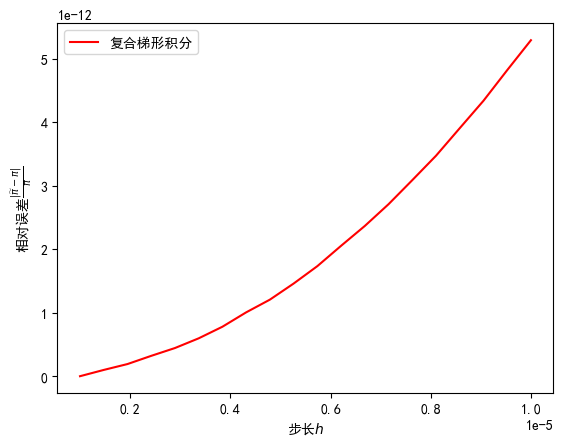

In [40]:
integral1=[]
integral2=[]
H=np.linspace(1e-6, 1e-5, 20)
for h in H:
    n=int(1/h)
    if n%2!=0:
        n+=1
    integral1.append(np.abs(composite_trapezoidal_rule(integrand, a, b, n)-np.pi)/np.pi)
    integral2.append(np.abs(composite_simpsons_rule(integrand, a, b, n)-np.pi)/np.pi)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False
plt.plot(H, integral1, label='复合梯形积分',  color='r')
# plt.plot(H, integral2, label='复合 Simpson 积分', color='y') 
plt.ylabel(r'相对误差$\frac{|\widetilde{\pi}-\pi|}{\pi}$')
plt.xlabel(r'步长$h$')
plt.legend()
plt.show()


In [41]:
def romberg_integration(f, a, b, n):
    r = np.zeros((n, n))
    h = b - a
    r[0, 0] = 0.5 * h * (f(a) + f(b))
    for i in range(1, n):
        h /= 2
        summ = 0
        for k in range(1, 2**i, 2):
            summ += f(a + k * h)
        r[i, 0] = 0.5 * r[i-1, 0] + summ * h
        for j in range(1, i+1):
            r[i, j] = r[i, j-1] + (r[i, j-1] - r[i-1, j-1]) / ((4**j) - 1)
    return r[n-1, n-1]

# 使用 Romberg 求积方法计算积分
n_romberg = 7  # Richardson 外推表的阶数
approx_pi_romberg = romberg_integration(integrand, a, b, n_romberg)
print("Approximation of pi using Romberg integration:", approx_pi_romberg)


Approximation of pi using Romberg integration: 3.1415926535897225


In [42]:
def trapezoidal_rule(f, a, b):
    return (b - a) * (f(a) + f(b)) / 2

def adaptive_trapezoidal_integration(func, a, b, tol):
    # 使用梯形公式积分法进行自适应积分
    mid = (a + b) / 2
    I1 = trapezoidal_rule(func, a, b)
    I2 = trapezoidal_rule(func, a, mid) + trapezoidal_rule(func, mid, b)
    if abs(I2 - I1) <= 3 * tol:
        return I2 + (I2 - I1) / 3
    else:
        left_int = adaptive_trapezoidal_integration(func, a, mid, tol / 2)
        right_int = adaptive_trapezoidal_integration(func, mid, b, tol / 2)
        return left_int + right_int

# 使用自适应积分方法计算积分
tolerance = 1e-7
approx_pi_adaptive1 = adaptive_trapezoidal_integration(integrand, a, b, tolerance)
print("Approximation of pi using adaptive integration(trapezoidal):", approx_pi_adaptive1)


Approximation of pi using adaptive integration(trapezoidal): 3.141592653588811


In [43]:
def adaptive_simpson_integration(func, a, b, tol):
    # 使用Simpson积分法进行自适应积分
    h = b - a
    c = (a + b) / 2
    fa = func(a)
    fb = func(b)
    fc = func(c)
    d = (a + c) / 2
    e = (c + b) / 2
    fd = func(d)
    fe = func(e)
    S1 = h * (fa + 4 * fc + fb) / 6
    S2 = h * (fa + 4 * fd + 2 * fc + 4 * fe + fb) / 12
    if abs(S2 - S1) <= 15 * tol:
        return S2 + (S2 - S1) / 15
    else:
        left_int = adaptive_simpson_integration(func, a, c, tol / 2)
        right_int = adaptive_simpson_integration(func, c, b, tol / 2)
        return left_int + right_int

# 使用自适应积分方法计算积分
tolerance = 1e-7
approx_pi_adaptive2 = adaptive_simpson_integration(integrand, a, b, tolerance)
print("Approximation of pi using adaptive integration(Simpson):", approx_pi_adaptive2)


Approximation of pi using adaptive integration(Simpson): 3.1415926538112613


In [44]:
# Gauss-Legendre 求积公式用于在区间 [-1, 1] 上对函数进行数值积分
def gauss_legendre_quadrature(f, n):
    [nodes, weights] = np.polynomial.legendre.leggauss(n)
    return np.sum(weights * f(nodes))

# Gauss-Laguerre 求积公式用于在区间 [0, ∞) 上对函数进行数值积分
def gauss_laguerre_quadrature(f, n):
    [nodes, weights] = np.polynomial.laguerre.laggauss(n)
    return np.sum(weights * (f(nodes) * np.exp(nodes)))

# Gauss-Chebyshev 求积公式用于在区间 [-1, 1] 上对具有权函数 1 / np.sqrt(1 - x**2) 的函数进行数值积分
def gauss_chebyshev_quadrature(f, n):
    nodes = np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n))
    weights = np.pi / n * np.ones(n)
    return np.sum(weights * f(nodes) * np.sqrt(1 - nodes**2))



In [48]:
#重积分计算
def f(x, y):
    return x + y

def composite_simpson_1d(f, a, b, n):
    """
    计算一维函数 f 在区间 [a, b] 上的复合 Simpson 积分

    参数：
    f: 被积函数
    a, b: 积分区间的下限和上限
    n: 将积分区间分成 n 个小段

    返回值：
    积分近似值
    """
    h = (b - a) / n
    integral = f(a) + f(b)

    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            integral += 2 * f(x)
        else:
            integral += 4 * f(x)

    integral *= h / 3
    return integral

def composite_simpson_2d(f, a_x, b_x, a_y, b_y, n_x, n_y):
    """
    计算二维函数 f 在矩形区域 [a_x, b_x] x [a_y, b_y] 上的复合 Simpson 积分

    参数：
    f: 被积函数
    a_x, b_x: x 积分区间的下限和上限
    a_y, b_y: y 积分区间的下限和上限
    n_x: 将 x 积分区间分成 n_x 个小段
    n_y: 将 y 积分区间分成 n_y 个小段

    返回值：
    积分近似值
    """
    integral = 0.
    h_x = (b_x - a_x) / n_x
    h_y = (b_y - a_y) / n_y

    for i in range(n_x):
        x0 = a_x + i * h_x
        x1 = a_x + (i + 1) * h_x
        for j in range(n_y):
            y0 = a_y + j * h_y
            y1 = a_y + (j + 1) * h_y
            # 在 y 方向上应用复合 Simpson 公式
            integral_y = composite_simpson_1d(lambda y: f(x0, y), y0, y1, n_y)
            # 在 x 方向上应用复合 Simpson 公式
            integral += composite_simpson_1d(lambda x: integral_y, x0, x1, n_x) 
    return integral

# 使用复合 Simpson 公式进行二重积分
def double_integral(f, a_x, b_x, a_y, b_y, n = 10):
    def f_integral(y):

        def f_double(x):
            return f(x, y)
        
        return composite_simpsons_rule(f_double, a_x, b_x, n)
    
    return composite_simpsons_rule(f_integral, a_y, b_y, n)

# 积分区间和分段数
a_x = 0
b_x = 1
a_y = 0
b_y = 1
n_x = 10
n_y = 10

# 计算二重积分
integral1 = composite_simpson_2d(f, a_x, b_x, a_y, b_y, n_x, n_y)
integral2 = double_integral(f, a_x, b_x, a_y, b_y)
print("The approximate value of the double integral:", integral1)
print("The approximate value of the double integral:", integral2)

The approximate value of the double integral: 0.9499999999999988
The approximate value of the double integral: 1.0


In [45]:
# 定义被积函数
def integrand_planck(x):
        # 定义被积函数
    if abs(x) < 1e-10:
        return x**3 / (np.exp(1e-10) - 1)
    elif x > np.log(np.inf) - 1:
        return 0
    else:
        return x**3 / (np.exp(x) - 1)
    
def integrand_planck_real(x):
        return x**3 / (np.exp(x) - 1)

# 积分区间
a_planck = 0
b_planck = 30

# 设置 Richardson 外推表的阶数
n_romberg_planck = 7

# 设置自适应积分方法的容许误差
tolerance_planck = 1e-6

# 复合梯形求积
n_trapezoidal = 1000
approx_integral_trapezoidal = composite_trapezoidal_rule(integrand_planck, a_planck, b_planck, n_trapezoidal)

# 复合 Simpson 求积
n_simpson = 1000
approx_integral_simpson = composite_simpsons_rule(integrand_planck, a_planck, b_planck, n_simpson)

# Romberg 求积
approx_integral_romberg = romberg_integration(integrand_planck, a_planck, b_planck, n_romberg_planck)

# 自适应积分
approx_integral_adaptive1 = adaptive_trapezoidal_integration(integrand_planck, a_planck, b_planck, tolerance_planck)
approx_integral_adaptive2 = adaptive_simpson_integration(integrand_planck, a_planck, b_planck, tolerance_planck)

# Gauss-Laguerre 求积公式
n_gauss_laguerre = 20
approx_integral_gauss_laguerre = gauss_laguerre_quadrature(integrand_planck_real, n_gauss_laguerre)


print("Approximation of the integral using composite trapezoidal rule:", approx_integral_trapezoidal)
print("Approximation of the integral using composite Simpson's rule:", approx_integral_simpson)
print("Approximation of the integral using Romberg integration:", approx_integral_romberg)
print("Approximation of the integral using adaptive integration(trapezoidal):", approx_integral_adaptive1)
print("Approximation of the integral using adaptive integration(Simpson):", approx_integral_adaptive2)
print("Approximation of the integral using Gauss-Laguerre integration:", approx_integral_gauss_laguerre)


Approximation of the integral using composite trapezoidal rule: 6.493939396095043
Approximation of the integral using composite Simpson's rule: 6.493939412970223
Approximation of the integral using Romberg integration: 6.493934406808086
Approximation of the integral using adaptive integration(trapezoidal): 6.493939403068948
Approximation of the integral using adaptive integration(Simpson): 6.493939449769743
Approximation of the integral using Gauss-Laguerre integration: 6.493939402219589
